In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import math
import os
import re
import csv

SyntaxError: ignored

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
train=train.drop('occyp_type', axis=1)
test=test.drop('occyp_type', axis=1)

In [ ]:
train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
print(train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())

gender :
0    17697
1     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64


In [ ]:
train["DAYS_EMPLOYED"] =-round(train["DAYS_EMPLOYED"]/365)
train["DAYS_BIRTH"] =-round(train["DAYS_BIRTH"]/365,-1)
train["begin_month"] =-round(train["begin_month"]/12)
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,40.0,13.0,1,0,0,0,2.0,0.0,1.0
1,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,30.0,4.0,1,0,0,1,3.0,0.0,1.0
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,50.0,12.0,1,0,1,0,2.0,2.0,2.0
3,3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,40.0,6.0,1,0,1,0,2.0,3.0,0.0
4,4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,40.0,6.0,1,0,0,0,2.0,2.0,2.0


In [ ]:
test["DAYS_EMPLOYED"] =-round(test["DAYS_EMPLOYED"]/365)
test["DAYS_BIRTH"] =-round(test["DAYS_BIRTH"]/365,-1)
test["begin_month"] =-round(test["begin_month"]/12)
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,26457,1,1,0,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,60.0,-1001.0,1,0,1,0,2.0,5.0
1,26458,0,0,1,0,135000.0,State servant,Higher education,Married,House / apartment,50.0,24.0,1,0,1,0,2.0,3.0
2,26459,0,0,1,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,40.0,1.0,1,1,1,0,2.0,3.0
3,26460,1,1,0,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,50.0,7.0,1,1,0,0,2.0,3.0
4,26461,0,1,1,0,225000.0,State servant,Higher education,Married,House / apartment,50.0,26.0,1,1,0,0,2.0,1.0


In [ ]:
train['income_total'] = round(train['income_total']/10000, -1)
test['income_total'] = round(test['income_total']/10000, -1)

(-0.161, 16.0]    11095
(16.0, 32.0]      13659
(32.0, 48.0]       1296
(48.0, 64.0]        228
(64.0, 80.0]        134
(80.0, 96.0]         31
(96.0, 112.0]         5
(112.0, 128.0]        0
(128.0, 144.0]        4
(144.0, 160.0]        5
Name: income_total, dtype: int64


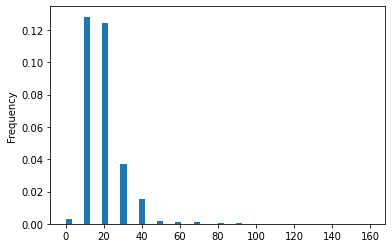

In [ ]:
print(train['income_total'].value_counts(bins=10,sort=False))
train['income_total'].plot(kind='hist',bins=50,density=True)

In [ ]:
train=train.drop('child_num', axis=1)
test=test.drop('child_num', axis=1)

In [ ]:
train.loc[train['family_size'] >= 4, 'family_size'] = 4
train.loc[train['DAYS_EMPLOYED'] >= 45, 'DAYS_EMPLOYED'] = 45

In [ ]:
for i in range(len(train['DAYS_EMPLOYED'])):
    a = train['DAYS_EMPLOYED'][i]
    if a < 20:
        train['DAYS_EMPLOYED'][i] = 10
    elif a < 30:
        train['DAYS_EMPLOYED'][i] = 20
    elif a < 40:
        train['DAYS_EMPLOYED'][i] = 30
    elif a < 50:
        train['DAYS_EMPLOYED'][i] = 40
    
    
train['DAYS_EMPLOYED'].value_counts()

10.0    25095
20.0     1112
30.0      210
40.0       40
Name: DAYS_EMPLOYED, dtype: int64

In [ ]:
for i in range(len(test['DAYS_EMPLOYED'])):
    a = test['DAYS_EMPLOYED'][i]
    if a < 20:
        test['DAYS_EMPLOYED'][i] = 10
    elif a < 30:
        test['DAYS_EMPLOYED'][i] = 20
    elif a < 40:
        test['DAYS_EMPLOYED'][i] = 30
    elif a < 50:
        test['DAYS_EMPLOYED'][i] = 40
    
    
train['DAYS_EMPLOYED'].value_counts()

10.0    25095
20.0     1112
30.0      210
40.0       40
Name: DAYS_EMPLOYED, dtype: int64

In [ ]:
train.groupby('DAYS_EMPLOYED').size()

DAYS_EMPLOYED
10.0    25095
20.0     1112
30.0      210
40.0       40
dtype: int64

In [ ]:
# 상관도가 높은 family_size 와 child_num 중 child_num 을 제거후의 상관도
# family_size 안에 child_num이 포함되어 있기 떄문에 child_num 제거
import matplotlib.pyplot as plt

plt.figure(figsize =(10,10))
corr = train.corr()



<Figure size 720x720 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10,10))
corr = test.corr()



<Figure size 720x720 with 0 Axes>

In [ ]:
print('edu_type 종류 : ',list(train.edu_type.unique()))
edu_order = {
    'Lower secondary' : 0, # 중학교 미만
    'Secondary / secondary special' : 1, #중학교
    'Incomplete higher' : 2, # 고등학교 중퇴
    'Higher education' : 3, # 고등학교 졸업
     'Academic degree' : 4 # 학사 이상
}
train.edu_type = train.edu_type.map(edu_order)
display(train[['edu_type']].head())

edu_type 종류 :  ['Higher education', 'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']


,edu_type
0,3
1,1
2,3
3,1
4,3


In [ ]:
print('edu_type 종류 : ',list(test.edu_type.unique()))
edu_order = {
    'Lower secondary' : 0, # 중학교 미만
    'Secondary / secondary special' : 1, #중학교
    'Incomplete higher' : 2, # 고등학교 중퇴
    'Higher education' : 3, # 고등학교 졸업
     'Academic degree' : 4 # 학사 이상
}
test.edu_type = test.edu_type.map(edu_order)
display(test[['edu_type']].head())

edu_type 종류 :  ['Secondary / secondary special', 'Higher education', 'Lower secondary', 'Incomplete higher', 'Academic degree']


,edu_type
0,1
1,3
2,1
3,1
4,3


In [ ]:
print('income_type 종류 : ',list(train.income_type.unique()))
income_order = {
    'Student' : 0, # 학생
    'Pensioner' : 1, #연금수령자
    'State servant' : 2, # 공무원
    'Working' : 3, # 회사원
    'Commercial associate' : 4 # 사엽
}
train.income_type = train.income_type.map(income_order)
display(train[['income_type']].head())

income_type 종류 :  ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']


,income_type
0,4
1,4
2,3
3,4
4,2


In [ ]:
print('income_type 종류 : ',list(test.income_type.unique()))
income_order = {
    'Student' : 0, # 학생
    'Pensioner' : 1, #연금수령자
    'State servant' : 2, # 공무원
    'Working' : 3, # 회사원
    'Commercial associate' : 4 # 사엽
}
test.income_type = test.income_type.map(income_order)
display(test[['income_type']].head())

income_type 종류 :  ['Pensioner', 'State servant', 'Working', 'Commercial associate', 'Student']


,income_type
0,1
1,2
2,3
3,4
4,2


In [ ]:
print('family_type 종류 : ',list(train.family_type.unique()))
family_order = {
    'Widow' : 0, # 과부
    'Single / not married' : 1, # 미혼
    'Separated' : 2, # 이혼
    'Civil marriage' : 3, # 민사적 혼인
    'Married' : 4 # 기혼
}
train.family_type = train.family_type.map(family_order)
display(train[['family_type']].head())

family_type 종류 :  ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']


,family_type
0,4
1,3
2,4
3,4
4,4


In [ ]:
print('family_type 종류 : ',list(test.family_type.unique()))
family_order = {
    'Widow' : 0, # 과부
    'Single / not married' : 1, # 미혼
    'Separated' : 2, # 이혼
    'Civil marriage' : 3, # 민사적 혼인
    'Married' : 4 # 기혼
}
test.family_type = test.family_type.map(family_order)
display(test[['family_type']].head())

family_type 종류 :  ['Civil marriage', 'Married', 'Single / not married', 'Widow', 'Separated']


,family_type
0,3
1,4
2,4
3,4
4,4


In [ ]:
print('house_type 종류 : ',list(train.house_type.unique()))
house_order = {
    'Office apartment' : 0, # 사무실 
    'Rented apartment' : 1, # 임대 
    'Co-op apartment' : 2, # 작은 아파트
    'With parents' : 3, # 부모님 함께
    'House / apartment' : 4, # 집 / 아파트 
    'Municipal apartment' : 5 # 고급 아파트 
}
train.house_type = train.house_type.map(house_order)
display(train[['house_type']].head())

house_type 종류 :  ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']


,house_type
0,5
1,4
2,4
3,4
4,4


In [ ]:
print('house_type 종류 : ',list(test.house_type.unique()))
house_order = {
    'Office apartment' : 0, # 사무실 
    'Rented apartment' : 1, # 임대 
    'Co-op apartment' : 2, # 작은 아파트
    'With parents' : 3, # 부모님 함께
    'House / apartment' : 4, # 집 / 아파트 
    'Municipal apartment' : 5 # 고급 아파트 
}
test.house_type = test.house_type.map(house_order)
display(test[['house_type']].head())

house_type 종류 :  ['House / apartment', 'With parents', 'Rented apartment', 'Municipal apartment', 'Office apartment', 'Co-op apartment']


,house_type
0,4
1,4
2,4
3,4
4,4


In [ ]:
train

,index,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,20.0,4,3,4,5,40.0,10.0,1,0,0,0,2.0,0.0,1.0
1,1,0,0,1,20.0,4,1,3,4,30.0,10.0,1,0,0,1,3.0,0.0,1.0
2,2,1,1,1,40.0,3,3,4,4,50.0,10.0,1,0,1,0,2.0,2.0,2.0
3,3,0,0,1,20.0,4,1,4,4,40.0,10.0,1,0,1,0,2.0,3.0,0.0
4,4,0,1,1,20.0,2,3,4,4,40.0,10.0,1,0,0,0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,20.0,2,1,4,4,30.0,10.0,1,0,0,0,4.0,0.0,1.0
26453,26453,0,0,1,20.0,3,3,2,4,40.0,10.0,1,0,0,0,2.0,4.0,2.0
26454,26454,0,1,0,30.0,3,1,3,3,30.0,10.0,1,0,0,0,2.0,2.0,2.0
26455,26455,1,0,1,20.0,3,2,1,4,30.0,10.0,1,0,0,0,1.0,5.0,2.0


In [ ]:
test

,index,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,26457,1,1,0,10.0,1,1,3,4,60.0,10.0,1,0,1,0,2.0,5.0
1,26458,0,0,1,10.0,2,3,4,4,50.0,20.0,1,0,1,0,2.0,3.0
2,26459,0,0,1,10.0,3,1,4,4,40.0,10.0,1,1,1,0,2.0,3.0
3,26460,1,1,0,10.0,4,1,4,4,50.0,10.0,1,1,0,0,2.0,3.0
4,26461,0,1,1,20.0,2,3,4,4,50.0,20.0,1,1,0,0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,20.0,3,2,4,4,50.0,10.0,1,1,1,0,2.0,2.0
9996,36453,1,1,1,20.0,3,1,3,4,30.0,10.0,1,1,0,0,2.0,3.0
9997,36454,0,0,1,30.0,3,1,4,4,60.0,30.0,1,0,0,0,2.0,5.0
9998,36455,0,1,0,20.0,4,1,4,4,50.0,10.0,1,0,1,0,2.0,3.0


In [ ]:
columns = ['gender','car','reality','income_total', 'income_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED','begin_month','credit']
train[columns].describe()

,gender,car,reality,income_total,income_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,credit
count,26457.000000,26457.000000,26457.000000,26457.000000,26457.00000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.331103,0.379748,0.673924,18.587897,2.81589,3.240239,3.897721,43.699588,10.624409,2.160373,1.519560
std,0.470619,0.485333,0.468784,10.533551,0.97826,1.261761,0.587750,11.716340,2.889487,1.434258,0.702283
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,20.000000,10.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,10.000000,3.00000,3.000000,4.000000,30.000000,10.000000,1.000000,1.000000
50%,0.000000,0.000000,1.000000,20.000000,3.00000,4.000000,4.000000,40.000000,10.000000,2.000000,2.000000
75%,1.000000,1.000000,1.000000,20.000000,3.00000,4.000000,4.000000,50.000000,10.000000,3.000000,2.000000
max,1.000000,1.000000,1.000000,160.000000,4.00000,4.000000,5.000000,70.000000,40.000000,5.000000,2.000000


In [ ]:
# test의 경우 'credit'이 없다.
column = ['gender','car','reality','income_total', 'income_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED','begin_month']
test[column].describe()
test[column].shape

(10000, 10)

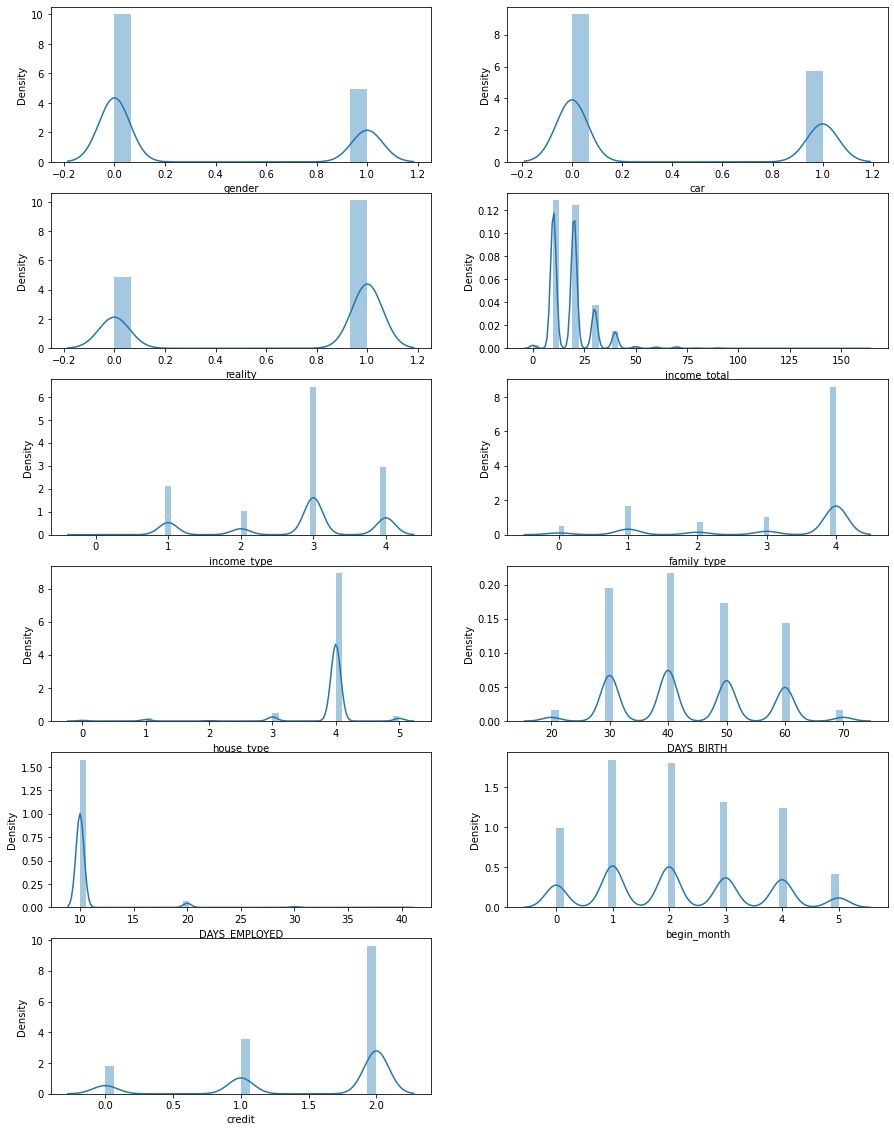

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,20))
for i in range(11):
    plt.subplot(6,2,i+1)
    sns.distplot(train[columns[i]])
plt.show()

In [ ]:
train.isnull().sum()

index            0
gender           0
car              0
reality          0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
credit           0
dtype: int64

In [ ]:
train[columns]

,gender,car,reality,income_total,income_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,credit
0,0,0,0,20.0,4,4,5,40.0,10.0,0.0,1.0
1,0,0,1,20.0,4,3,4,30.0,10.0,0.0,1.0
2,1,1,1,40.0,3,4,4,50.0,10.0,2.0,2.0
3,0,0,1,20.0,4,4,4,40.0,10.0,3.0,0.0
4,0,1,1,20.0,2,4,4,40.0,10.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,20.0,2,4,4,30.0,10.0,0.0,1.0
26453,0,0,1,20.0,3,2,4,40.0,10.0,4.0,2.0
26454,0,1,0,30.0,3,3,3,30.0,10.0,2.0,2.0
26455,1,0,1,20.0,3,1,4,30.0,10.0,5.0,2.0


In [ ]:
train_x=train[columns].drop('credit', axis=1)
train_y=train[columns][['credit']]
test_x=test[column]

In [ ]:
print(train_x.shape, train_y.shape, test_x.shape)

(26457, 10) (26457, 1) (10000, 10)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.5,
                                                    random_state = 20000)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


clf=RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(13228, 4)
(13228, 1)
Validation set: 
(13229, 4)
(13229, 1)
log_loss: 0.9627815612662608


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        # sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(clf)

FOLD 0 : logloss:0.9361968136692354
FOLD 1 : logloss:0.9220360034210842
FOLD 2 : logloss:0.9365199897776214
FOLD 3 : logloss:0.9076266914536448
FOLD 4 : logloss:0.9145640163960096
Mean:0.9233887029435189


In [ ]:
my_submission

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
submission.loc[:,1:]=my_submission

차원 축소 사용

In [ ]:
from sklearn.preprocessing import StandardScaler
train_scaled = StandardScaler().fit_transform(train[columns])
print(train_scaled)
test_scaled = StandardScaler().fit_transform(test[column])
print(test_scaled)

[[-0.70356176 -0.78246318 -1.43762552 ... -0.21610105 -1.50629398
  -0.73983001]
 [-0.70356176 -0.78246318  0.69559144 ... -0.21610105 -1.50629398
  -0.73983001]
 [ 1.42133933  1.27801541  0.69559144 ... -0.21610105 -0.11181842
   0.68412478]
 ...
 [-0.70356176  1.27801541 -1.43762552 ... -0.21610105 -0.11181842
   0.68412478]
 [ 1.42133933 -0.78246318  0.69559144 ... -0.21610105  1.97989493
   0.68412478]
 [-0.70356176 -0.78246318 -1.43762552 ... -0.21610105 -0.8090562
   0.68412478]]
[[ 1.43558774  1.27841775 -1.41718862 ...  1.3821387  -0.21716886
   1.99957386]
 [-0.69657881 -0.78221692  0.70562237 ...  0.52611325  3.29689036
   0.58784422]
 [-0.69657881 -0.78221692  0.70562237 ... -0.32991221 -0.21716886
   0.58784422]
 ...
 [-0.69657881 -0.78221692  0.70562237 ...  1.3821387   6.81094958
   1.99957386]
 [-0.69657881  1.27841775 -1.41718862 ...  0.52611325 -0.21716886
   0.58784422]
 [-0.69657881 -0.78221692  0.70562237 ... -1.18593767 -0.21716886
  -0.82388542]]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(train_scaled)
train_pca = pca.transform(train_scaled)
print(train_pca.shape)

pca.fit(test_scaled)
test_pca = pca.transform(test_scaled)
print(test_pca.shape)


(26457, 2)
(10000, 2)


In [ ]:
pca_columns=['pca_component_1','pca_component_2']
trainDF_pca = pd.DataFrame(train_pca,columns=pca_columns)
trainDF_pca['credit']=train.credit
trainDF_pca.head(3)

# pca_columns=['pca_component_1','pca_component_2']
# testDF_pca = pd.DataFrame(test_pca,columns=pca_columns)
# testDF_pca['credit']=test.credit
# testDF_pca.head(3)

,pca_component_1,pca_component_2,credit
0,0.207268,-1.483506,1.0
1,0.452356,-1.876356,1.0
2,1.554489,2.172593,2.0


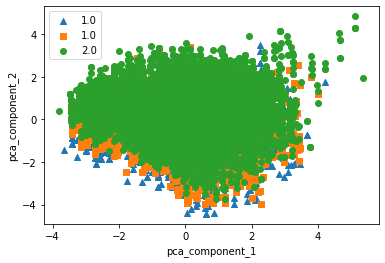

In [ ]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']
#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = trainDF_pca[trainDF_pca['credit']==i]['pca_component_1']
    y_axis_data = trainDF_pca[trainDF_pca['credit']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=train.credit[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

[0.19753398 0.12172212]


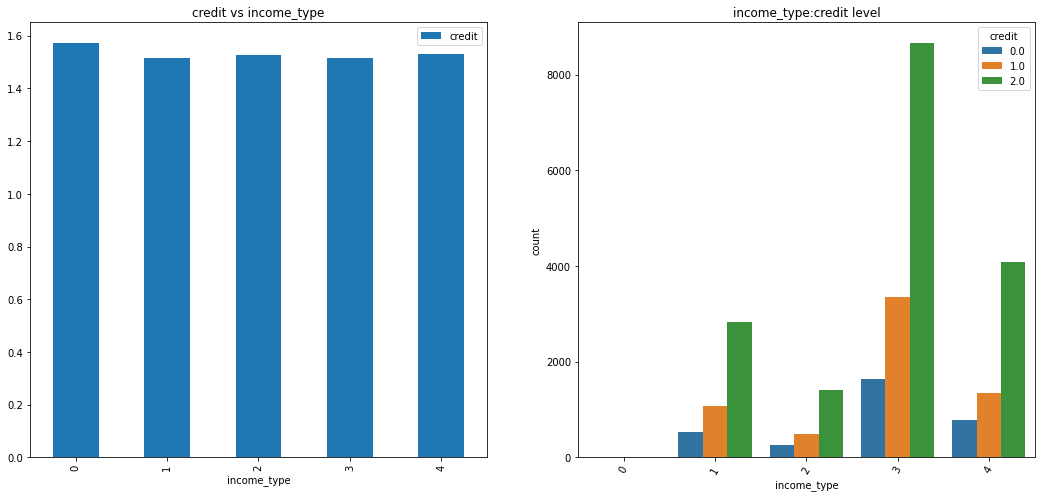

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['income_type','credit']].groupby(['income_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs income_type')
sns.countplot('income_type',hue='credit',data=train,ax=ax[1])
ax[1].set_title('income_type:credit level')
plt.xticks(rotation=60)
plt.show()

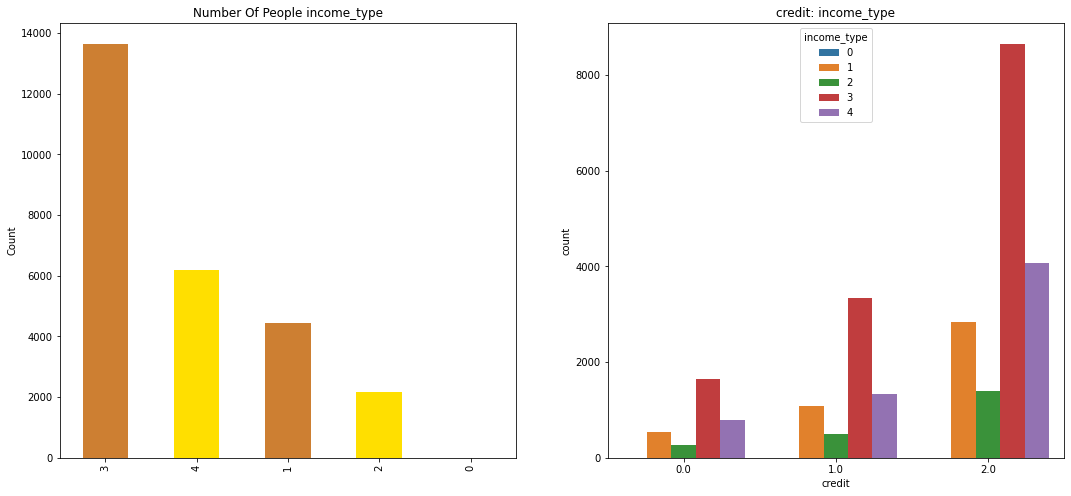

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['income_type'].value_counts().plot.bar(color=['#CD7F32','#FFDF00'],ax=ax[0])
ax[0].set_title('Number Of People income_type')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='income_type',data=train,ax=ax[1])
ax[1].set_title('credit: income_type')
plt.show()

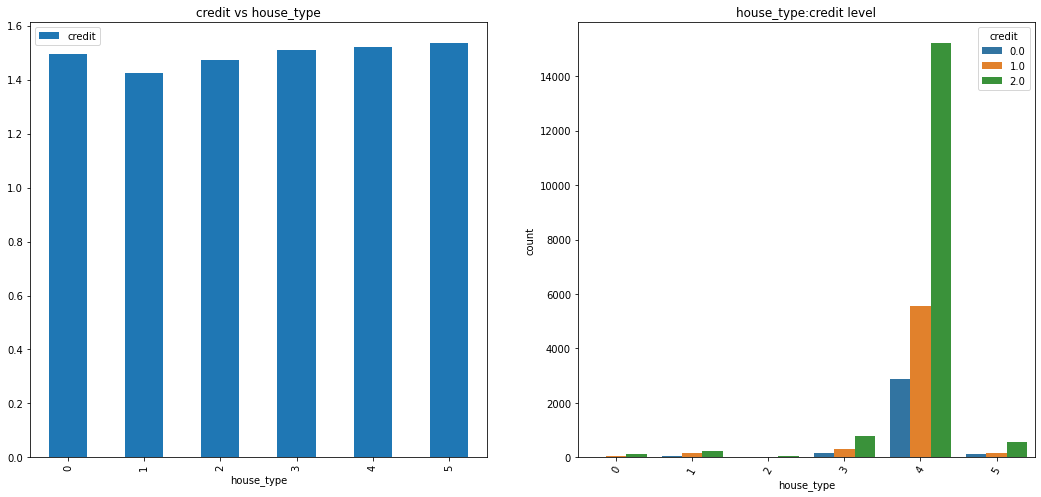

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['house_type','credit']].groupby(['house_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs house_type')
sns.countplot('house_type',hue='credit',data=train,ax=ax[1])
ax[1].set_title('house_type:credit level')
plt.xticks(rotation=60)
plt.show()

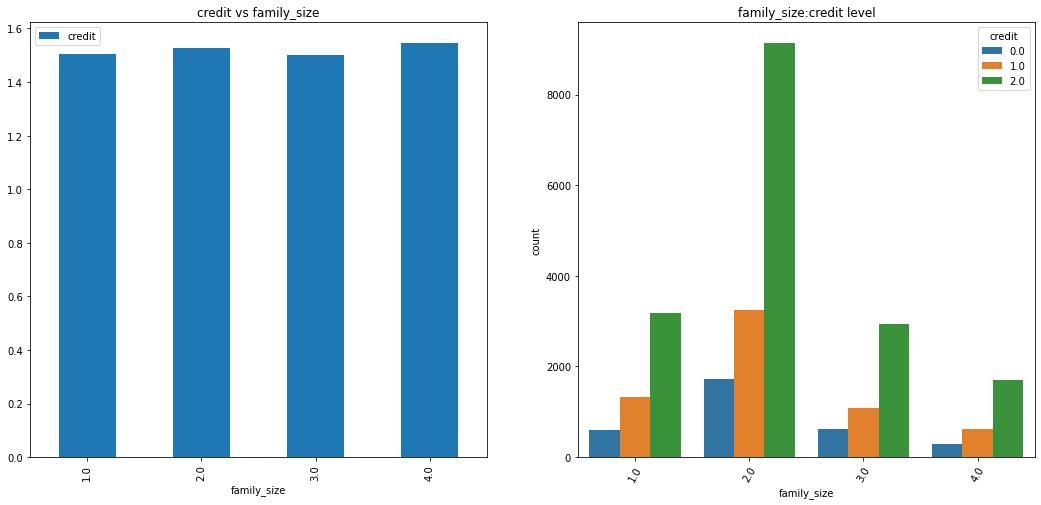

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['family_size','credit']].groupby(['family_size']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs family_size')
sns.countplot('family_size',hue='credit',data=train,ax=ax[1])
ax[1].set_title('family_size:credit level')
plt.xticks(rotation=60)
plt.show()

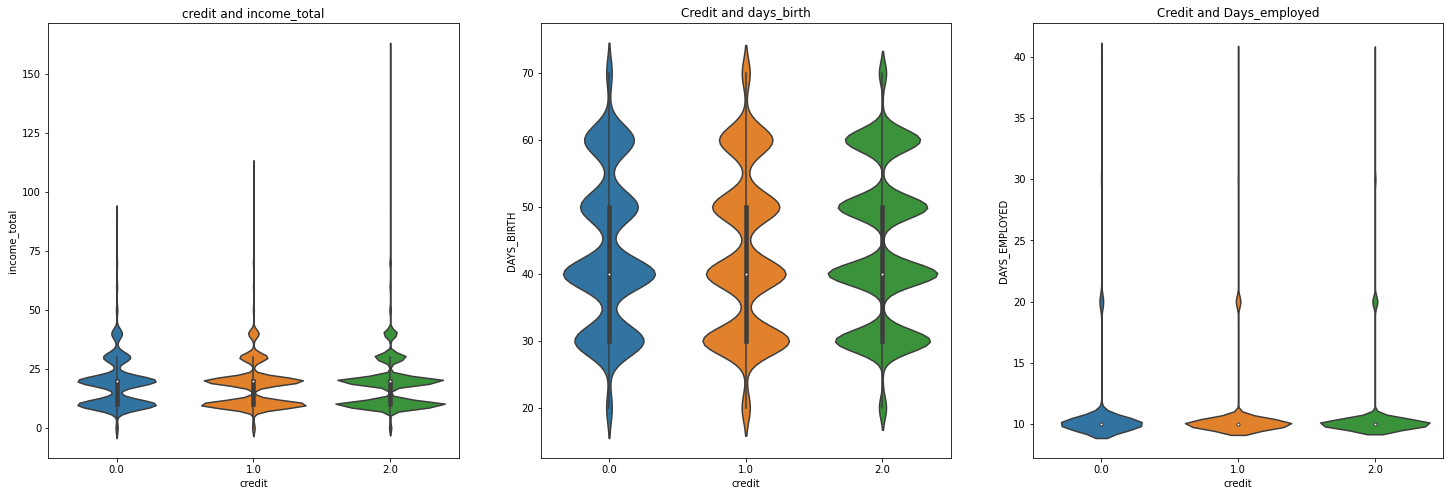

In [ ]:
f,ax=plt.subplots(1,3,figsize=(25,8))
sns.violinplot("credit","income_total", data=train,split=True,ax=ax[0])
ax[0].set_title('credit and income_total')
#ax[0].set_yticks(range(0,110,10))
sns.violinplot("credit","DAYS_BIRTH",  data=train,split=True,ax=ax[1])
ax[1].set_title('Credit and days_birth')
#ax[1].set_yticks(range(0,110,10))
sns.violinplot("credit","DAYS_EMPLOYED", data=train,split=True,ax=ax[2])
ax[2].set_title('Credit and Days_employed')
#ax[1].set_yticks(range(0,110,10))
plt.show()

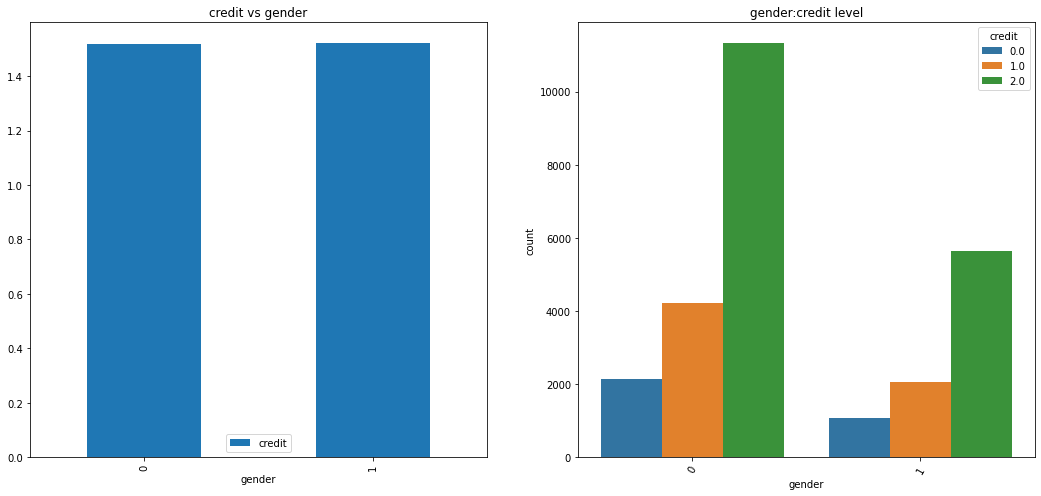

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['gender','credit']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs gender')
sns.countplot('gender',hue='credit',data=train,ax=ax[1])
ax[1].set_title('gender:credit level')
plt.xticks(rotation=60)
plt.show()

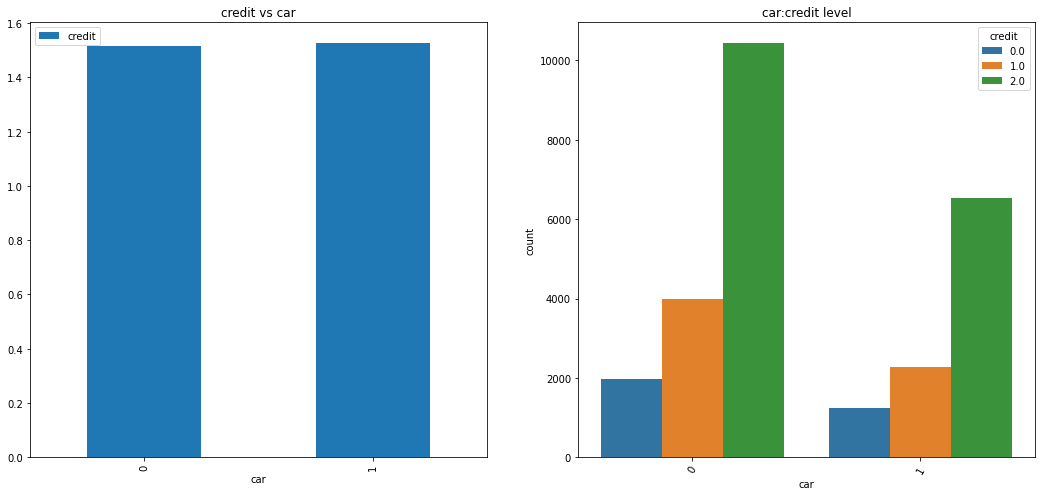

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['car','credit']].groupby(['car']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs car')
sns.countplot('car',hue='credit',data=train,ax=ax[1])
ax[1].set_title('car:credit level')
plt.xticks(rotation=60)
plt.show()

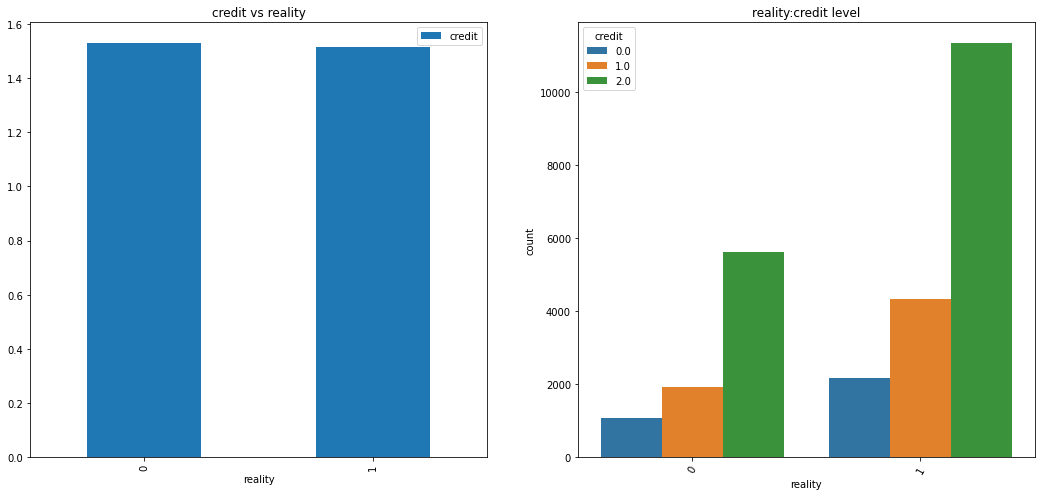

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['reality','credit']].groupby(['reality']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs reality')
sns.countplot('reality',hue='credit',data=train,ax=ax[1])
ax[1].set_title('reality:credit level')
plt.xticks(rotation=60)
plt.show()

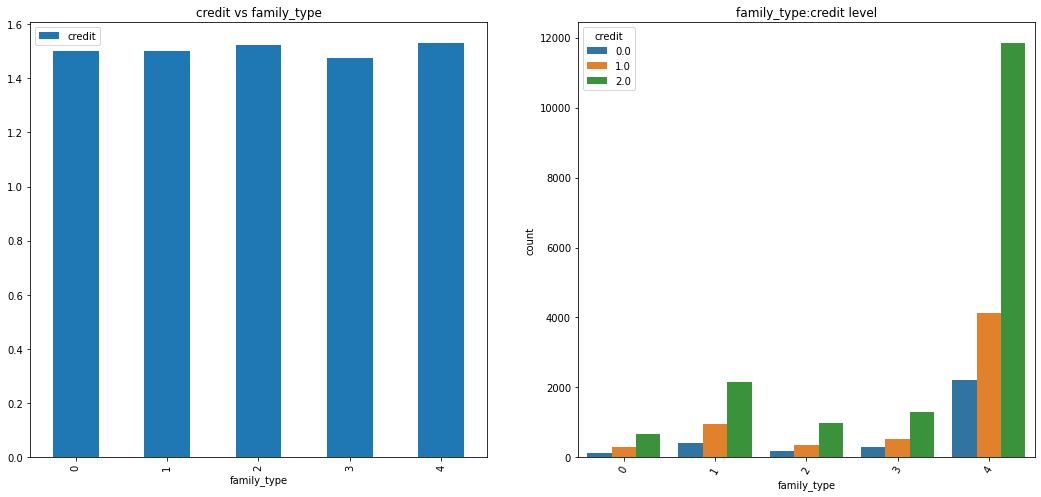

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['family_type','credit']].groupby(['family_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs family_type')
sns.countplot('family_type',hue='credit',data=train,ax=ax[1])
ax[1].set_title('family_type:credit level')
plt.xticks(rotation=60)
plt.show()

In [ ]:
train[columns]
# test[column]

,gender,car,reality,income_total,income_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,credit
0,0,0,0,20.0,4,4,5,40.0,10.0,0.0,1.0
1,0,0,1,20.0,4,3,4,30.0,10.0,0.0,1.0
2,1,1,1,40.0,3,4,4,50.0,10.0,2.0,2.0
3,0,0,1,20.0,4,4,4,40.0,10.0,3.0,0.0
4,0,1,1,20.0,2,4,4,40.0,10.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,20.0,2,4,4,30.0,10.0,0.0,1.0
26453,0,0,1,20.0,3,2,4,40.0,10.0,4.0,2.0
26454,0,1,0,30.0,3,3,3,30.0,10.0,2.0,2.0
26455,1,0,1,20.0,3,1,4,30.0,10.0,5.0,2.0


In [ ]:
col = ['house_type', 'income_type', 'family_size','family_type','credit']
cols = ['house_type', 'income_type', 'family_size','family_type']

In [ ]:
col_house = ['house_type', 'credit']
col_income = ['income_type','credit']
col_familys = ['family_size', 'credit']
col_familyt = ['family_type', 'credit']

다층신경망(Multi-Layer-Perceptron:MLP)
[입력 - 은닉 - 출력] 으로 구성된 MLP의 기본 구조
w1 과 b1 은 입력층과 은닉층의 가중치와 바이어스,
w2 과 b2 은 은닉층과 출력층의 가중치와 바이어스
초기값은 모두 가우시안 랜덤 값으로 초기화

In [ ]:
import numpy
import scipy.special


#neural network class definition
class Network:
    
    #initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #set number of nodes in each input, hidden, output layer 
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        #가중치 행렬 wih(input_hidden)와 who(hidden_output)
        #배열 내 가중치는 w_i_j로 표기. 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
        #w11 w21
        #w12 w22

        self.wih = numpy.random.normal(0.0, pow(self.hnodes, - 0.5),(self.hnodes, self.inodes))
        self.wih = numpy.random.normal(0.0, pow(self.onodes, - 0.5),(self.onodes, self.hnodes))

        #learning rate
        self.lr = learningrate

        #expit()는 시그모이드 함수
        self.activation_function = lambda x: scipy.special.expit(x)

        pass

    #신경망 학습시키기
    def train(self, inputs_list, targets_list):
      #입력 리스트를 2차원의 행렬로 변환
      inputs = numpy.array(inputs_list, ndmin=2).T
      targets = numpy.array(targets_list, ndmin=2).T

      #은닉 계층으로 들어오는 신호를 계산
      hidden_inputs = numpy.dot(self.wih, inputs)
      #은닉 계층에서 나가는 신호를 계산
      hidden_outputs = self.activation_function(hidden_inputs)

      #최종 출력 계층으로 들어오는 신호를 계산
      final_inputs = numpy.dot(delf.who, hidden_outputs)
      #최종 출력 계층에서 나가는 신호를 계산
      final_outputs = self.activation_function(final_inputs)

      #출력 계층의 오차는 (실제 값 - 계산 값)
      output_errors = targets - final_outputs
      #은닉 계층의 오차는 가중치에 의해 나뉜 계층의 오차들을 재조합해 계산
      hidden_errors = numpy.dot(self.who.T, output_errors) 

      #은닉 계층과 출력 계층 간의 가중치 업데이트
      self.who += self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))

      #입력 계층과 은닉 계층 간의 가중치 업데이트
      self.wih += self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))
      pass

    #신경망에 질의하기
    def query(self, inputs_list):
      #입력 리스트를 2차원 행렬로 변환
      inputs = numpy.array(inputs_list, ndmin=2).T
      #은닉 계층으로 들어오는 신호를 계산
      hidden_inputs = numpy.dot(self.wih, inputs)
      #은닉 계층에서 나가는 신호를 계산
      hidden_outputs = self.activation_function(hidden_inputs)
      #최종 출력 계층으로 들어오는 신호 계산 
      final_inputs = numpy.dot(self.wih, hidden_outputs)
      #최종 출력 계층에서 나가는 신호 계산 
      final_outputs = self.activation_function(final_inputs)
      
      return final_outputs

col = ['house_type', 'income_type', 'family_size','family_type']

col2 = ['gender', 'car', 'reality','house_type', 'income_type', 'family_size','family_type','credit']


In [ ]:
#입력, 은닉, 출력 노드의 수
input_nodes = 2
hidden_nodes = 2
output_nodes = 2

# 학습률 0.9
learning_rate = 0.9

#신경망의 인스턴스 생성
n = Network(input_nodes, hidden_nodes, output_nodes, learning_rate)
n.query(train[col_house])

array([[0.49384521, 0.49379399, 0.49334458, ..., 0.49388155, 0.49334458,
        0.49334458],
       [0.33298522, 0.32897707, 0.31654192, ..., 0.31374183, 0.31654192,
        0.31654192]])

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.5,
                                                    random_state = 20000)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


clf=RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(13228, 4)
(13228, 1)
Validation set: 
(13229, 4)
(13229, 1)
log_loss: 0.9543780732721044


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        # sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(clf)

FOLD 0 : logloss:0.9470246586650113
FOLD 1 : logloss:0.9045349137375076
FOLD 2 : logloss:0.9423258877592959
FOLD 3 : logloss:0.9188981725631052
FOLD 4 : logloss:0.9143777371575263
Mean:0.9254322739764893
